  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|-|-|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Taks 1
Какую из этих гипотез нельзя проверить с помощью критерия знаков?

## Answer
* (+) Гипотеза о равенстве средних в двух независимых выборках
* (-) Гипотеза о равенстве средних в двух независимых выборках
* (-) Гипотеза о равенстве средних в двух связанных выборках

## Task 2
Какую из этих гипотез о средних двух независимых выборок проверяет критерий Манна-Уитни?

## Answer
* (-) $H_0\colon \mathbb{E}X_1 = \mathbb{E}X_2$ против $H_1\colon \mathbb{E}X_1 < \neq > \mathbb{E}X_2$
* (-) $H_0\colon P\left(X_1>X_2\right)=\frac1{2}$ против $H_1\colon P\left(X_1>X_2\right)<\neq>\frac1{2}$
* (-) $H_0\colon med X_1= med X_2$ против $H_1\colon med X_1 <\neq> med X_2$
* (+) $H_0\colon F_{X_1}(x)=F_{X_2}(x)$ против $H_1\colon F_{X_1}(x) = F_{X_2}(x+\Delta), \Delta<\neq>0$

## Taks 3
У вас есть две регрессионные модели и двадцать наборов данных. На обучающей подвыборке каждого набора вы настраиваете обе модели и считаете среднеквадратичную ошибку на тестовой подвыборке набора. Какими из этих критериев не стоит проверять гипотезу о том, что среднее качество регрессионных моделей одинаково?

## Answer
* (-) Критерий знаков
* (-) Критерий знаковых рангов
* (+) Критерий Стьюдента для двух независимых выборок
* (+) Критерий Манна-Уитни
* (+) Перестановочный критерий со статистикой $T=\frac1{n}\sum\limits_{i=1}^n X_{1i}-\frac1{n}\sum\limits_{i=1}^n X_{2i}$ 
и $C^n_{2n}$ вариантами расстановки объектов по выборкам
* (-) Перестановочный критерий со статистикой $T=\sum\limits_{i=1}^n \left(X_{1i}-X_{2i}\right)$ 
и $2^n$ вариантами расстановки знаков у попарных разностей

## Task 4
Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

$\mathbf{49, 58, 75, 110, 112, 132, 151, 276, 281, 362^*}$
 

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы $H_0\colon med X = 200$
на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

## Answer
* Assumption: set is simmetric vs median
* null hypothesis: $med(X)=200=m_0$
* alternative hypothesis: $med(X)\neq200$
* Wilkinson statistic: $W(X) = \sum^{n}_{i=1}rank(|X_i-m_0|)\cdot sign(X_i-m_0)$
* null distribution: from table

In [82]:
import numpy as np
data      = np.array([49,58,75,110,112,132,151,276,281,362]) - 200
data_diff = np.sort(np.abs(data))
data_diff.sort()

In [83]:
diff_to_rank = dict(zip(data_diff, range(1, len(data) + 1)))

In [84]:
rank  = np.array(list(map(lambda x: diff_to_rank[x], np.abs(data))))
sign  = data > 0
wstat = ((data>0) * rank - (data<0)*rank).sum()
print('Wilcoxon statistic value: {:.4f}'.format(wstat))

Wilcoxon statistic value: -21.0000


In [85]:
import itertools

perm  = np.array([tuple(map(int, seq)) for seq in itertools.product('01', repeat=len(data))])
distr = ((perm - .5)*2) @ rank

<BarContainer object of 35 artists>

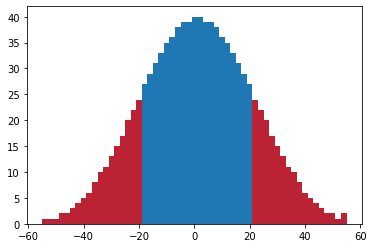

In [86]:
import matplotlib.pyplot as plt

num, bins, _ = plt.hist(distr, bins=55)
alt = np.argwhere(np.logical_or(bins[:-1] >= -wstat,
                                bins[:-1] <= wstat)
                 )
plt.bar(((bins[:-1] - (bins[0] - bins[1]) / 2)[alt]).flatten(), 
        (num[alt]).flatten(), color = 'red', alpha=0.7, width=bins[0] - bins[1])

In [87]:
unique, proba = np.unique(distr, return_counts=True)
proba = proba / len(distr)
alt = np.argwhere(np.logical_or(unique > -wstat, unique < wstat))

print('p-value: {:.4f}'.format(proba[alt].sum()))

p-value: 0.2754


In [88]:
from scipy import stats
stats.wilcoxon(data)

WilcoxonResult(statistic=17.0, pvalue=0.2845026979112075)

## Task 5
В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

22,22,15,13,19,19,18,20,21,13,13,15,

и в 9 лесах, где идёт вырубка:

17, 18, 18, 15, 12, 4, 14, 15, 10.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [89]:
x1 = [22,22,15,13,19,19,18,20,21,13,13,15]

x2 = [17, 18, 18, 15, 12, 4, 14, 15, 10]

def get_ranks(arr):
    arr = np.array(arr)
    arr.sort()
    unique, counts = np.unique(arr, return_counts=True)

    return dict(zip(unique, 
                    [(np.argwhere(arr == x) + 1).sum()/y for x,y in zip(unique, counts)]
                   )
               )
    

def get_permutations(n1, n2):
    indexes = range(1, n1 + n2 + 1)
    result = set(itertools.combinations(indexes, n1))
    return result

def get_rank_distr(n1, n2):
    #sum = int((n1 + n2 + 1) / 2 * (n1 + n2))
    ranks = np.array(list(map(sum, get_permutations(n1, n2))))
    rank, count = np.unique(ranks, return_counts=True)
    proba = count / len(ranks)
    return rank, proba

159.0


<BarContainer object of 28 artists>

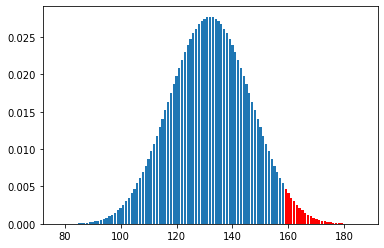

In [90]:
num_to_rank = get_ranks(x1 + x2)
stat = sum([num_to_rank[el] for el in x1])
ranks, proba = get_rank_distr(len(x1), len(x2))
alt = np.argwhere(ranks >= stat).flatten()

print(stat)
plt.bar(ranks, proba)
plt.bar(ranks[alt], proba[alt], color='red', alpha=1)

In [91]:
print('p-value: {:.4f}'.format(proba[alt].sum()))

p-value: 0.0292


In [92]:
stats.mannwhitneyu(x1, x2)

MannwhitneyuResult(statistic=27.0, pvalue=0.02900499272087373)

## Task 6
28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

**challenger.txt**

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

* установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
* сделайте по 1000 псевдовыборок из каждой выборки.




In [93]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [94]:
# columns: [temperature, incident]
data = np.loadtxt('challenger.txt', skiprows=1, usecols=(1,2))
x1 = data[data[:,1]>0][:,0]
x2 = data[data[:,1]==0][:,0]
np.random.seed(0)
bs_x1 = list(map(np.mean, get_bootstrap_samples(x1, 1000)))
bs_x2 = list(map(np.mean, get_bootstrap_samples(x2, 1000)))
delta_median = list(x[0] - x[1] for x in zip(bs_x1, bs_x2))

In [95]:
print('Confidence interval: [{:.4f}, {:.4f}]'.format(*stat_intervals(delta_median, 0.05)))

Confidence interval: [-8.0646, -1.4504]


## Task 7
На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

* установите random seed = 0;
* возьмите 10000 перестановок.

In [96]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [97]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

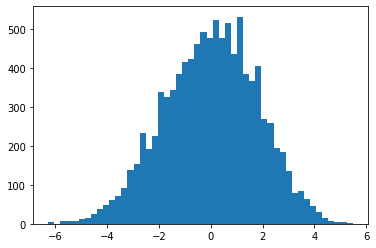

In [98]:
plt.hist(permutation_zero_dist_ind(x1, x2, max_combinations=10000), 50)
plt.show()

In [99]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [100]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [101]:
np.random.seed(0)
print('p-value: {:.4f}'.format(permutation_test(x1, x2, max_permutations=10000)))

p-value: 0.0057
